A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

Scikit-learn implements different classes to estimate Gaussian mixture models, that correspond to different estimation strategies, detailed below.

 Manifold learning

High-dimensional datasets can be very difficult to visualize. While data in two or three dimensions can be plotted to show the inherent structure of the data, equivalent high-dimensional plots are much less intuitive. To aid visualization of the structure of a dataset, the dimension must be reduced in some way.

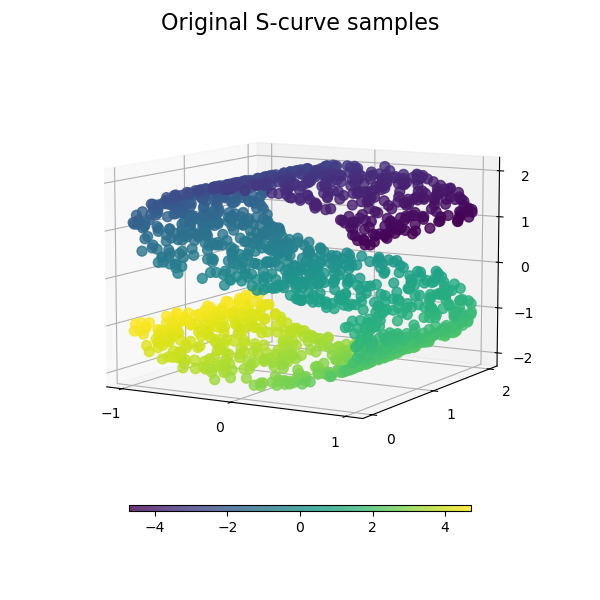

The simplest way to accomplish this dimensionality reduction is by taking a random projection of the data. Though this allows some degree of visualization of the data structure, the randomness of the choice leaves much to be desired. In a random projection, it is likely that the more interesting structure within the data will be lost.

To address this concern, a number of supervised and unsupervised linear dimensionality reduction frameworks have been designed, such as Principal Component Analysis (PCA), Independent Component Analysis, Linear Discriminant Analysis, and others. These algorithms define specific rubrics to choose an “interesting” linear projection of the data. These methods can be powerful, but often miss important non-linear structure in the data.

###  Clustering

Clustering of unlabeled data can be performed with the module sklearn.cluster.

Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

K-means

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N
 samples X
 into K
 disjoint clusters C
, each described by the mean mj
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X
, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>&#x3BC;</mi>
        <mi>j</mi>
      </msub>
      <mo>&#x2208;</mo>
      <mi>C</mi>
    </mrow>
  </munder>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mi>j</mi>
  </msub>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">)</mo>
</math>

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.



K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose k
 samples from the dataset X
. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

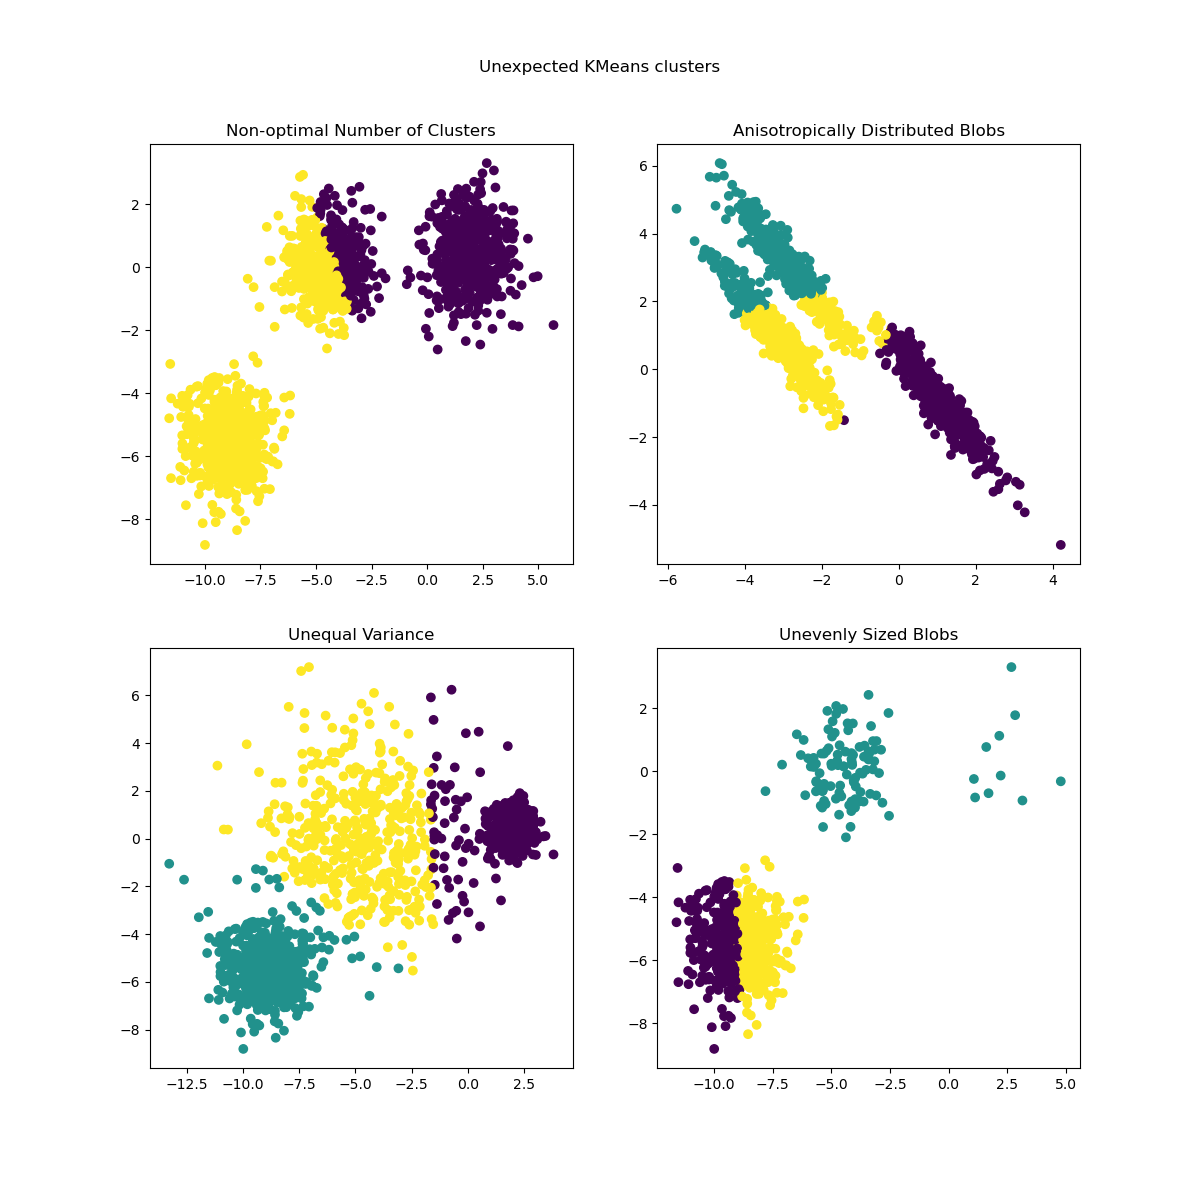

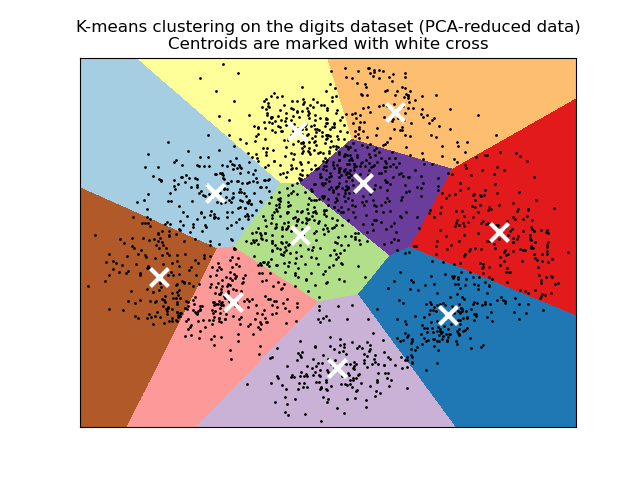

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

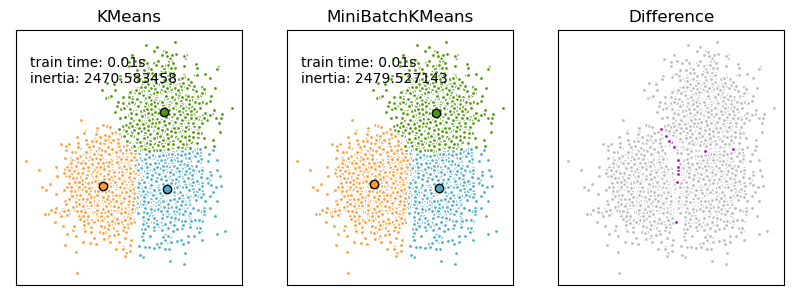

AgglomerativeClustering supports Ward, single, average, and complete linkage strategies.

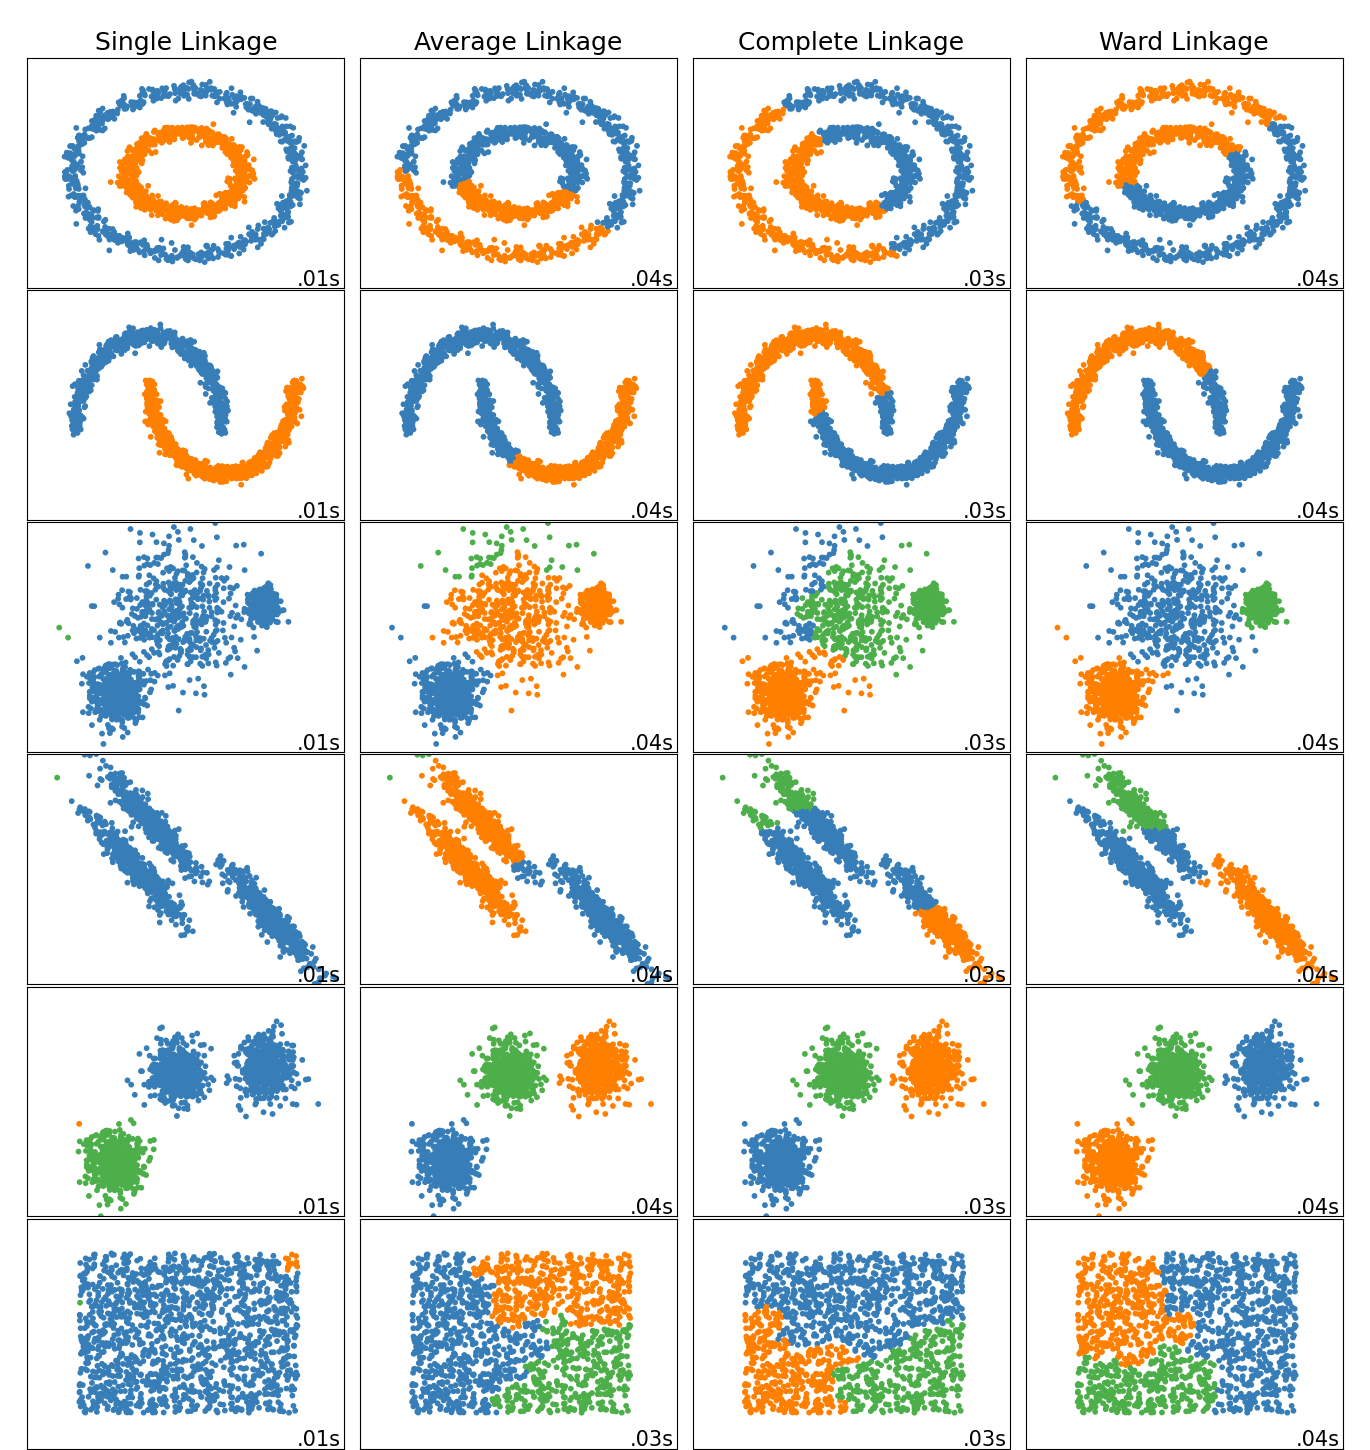

DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

ny core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

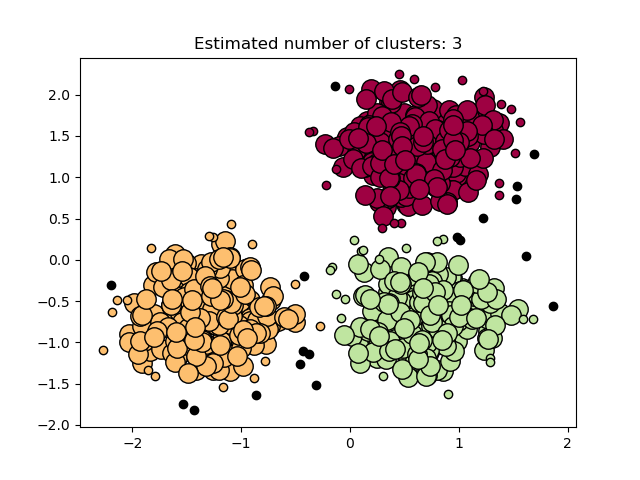

 Hierarchical Clustering

HDBSCAN can be seen as an algorithm which performs DBSCAN* clustering across all values of 
. As mentioned prior, this is equivalent to finding the connected components of the mutual reachability graphs for all values of 
. To do this efficiently, HDBSCAN first extracts a minimum spanning tree (MST) from the fully -connected mutual reachability graph, then greedily cuts the edges with highest weight. An outline of the HDBSCAN algorithm is as follows:

Extract the MST of 
.

Extend the MST by adding a “self edge” for each vertex, with weight equal to the core distance of the underlying sample.

Initialize a single cluster and label for the MST.

Remove the edge with the greatest weight from the MST (ties are removed simultaneously).

Assign cluster labels to the connected components which contain the end points of the now-removed edge. If the component does not have at least one edge it is instead assigned a “null” label marking it as noise.

Repeat 4-5 until there are no more connected components.

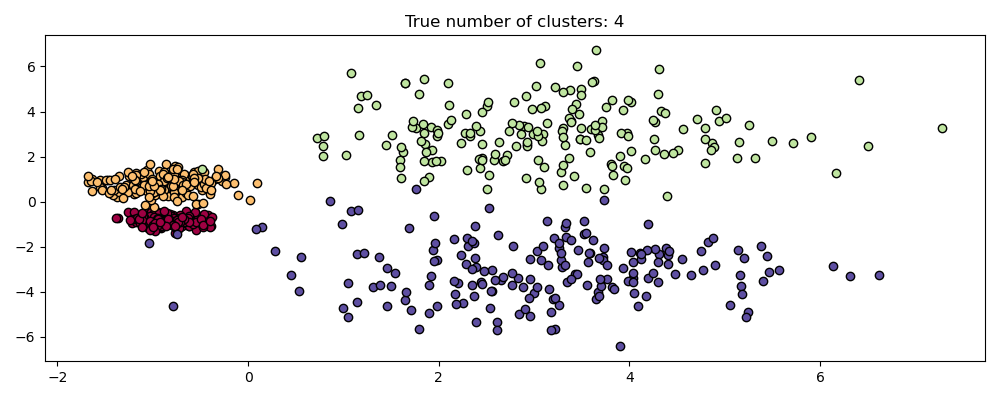

In [1]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

np.float64(0.6666666666666666)

Homogeneity, completeness and V-measure

homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

In [2]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.homogeneity_score(labels_true, labels_pred)

np.float64(0.6666666666666669)

In [ ]:

metrics.completeness_score(labels_true, labels_pred)

np.float64(0.6666666666666669)


Fowlkes-Mallows scores
The original Fowlkes-Mallows index (FMI) was intended to measure the similarity between two clustering results, which is inherently an unsupervised comparison. The supervised adaptation of the Fowlkes-Mallows index (as implemented in sklearn.metrics.fowlkes_mallows_score) can be used when the ground truth class assignments of the samples are known. The FMI is defined as the geometric mean of the pairwise precision and recall:



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>FMI</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>TP</mtext>
    <msqrt>
      <mo stretchy="false">(</mo>
      <mtext>TP</mtext>
      <mo>+</mo>
      <mtext>FP</mtext>
      <mo stretchy="false">)</mo>
      <mo stretchy="false">(</mo>
      <mtext>TP</mtext>
      <mo>+</mo>
      <mtext>FN</mtext>
      <mo stretchy="false">)</mo>
    </msqrt>
  </mfrac>
</math>

In [5]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

In [6]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

np.float64(0.551191604619592)

In [7]:
kmeans_model

KMeans(n_clusters=3, random_state=1)

In [8]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

 Principal component analysis (PCA)

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns 
 components in its fit method, and can be used on new data to project it on these components.

PCA centers but does not scale the input data for each feature before applying the SVD. The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.

Below is an example of the iris dataset, which is comprised of 4 features, projected on the 2 dimensions that explain most variance:

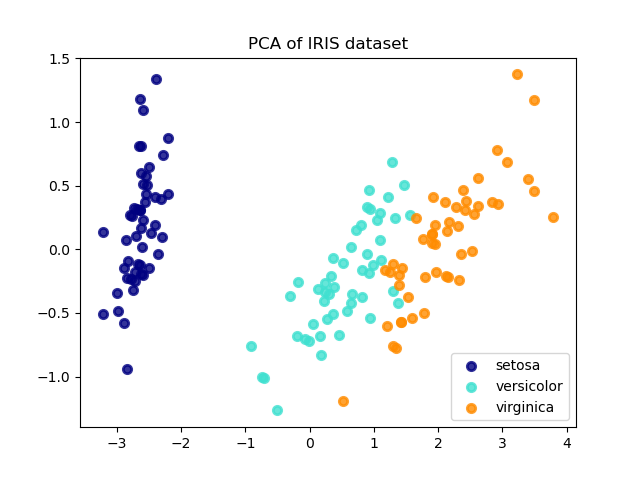

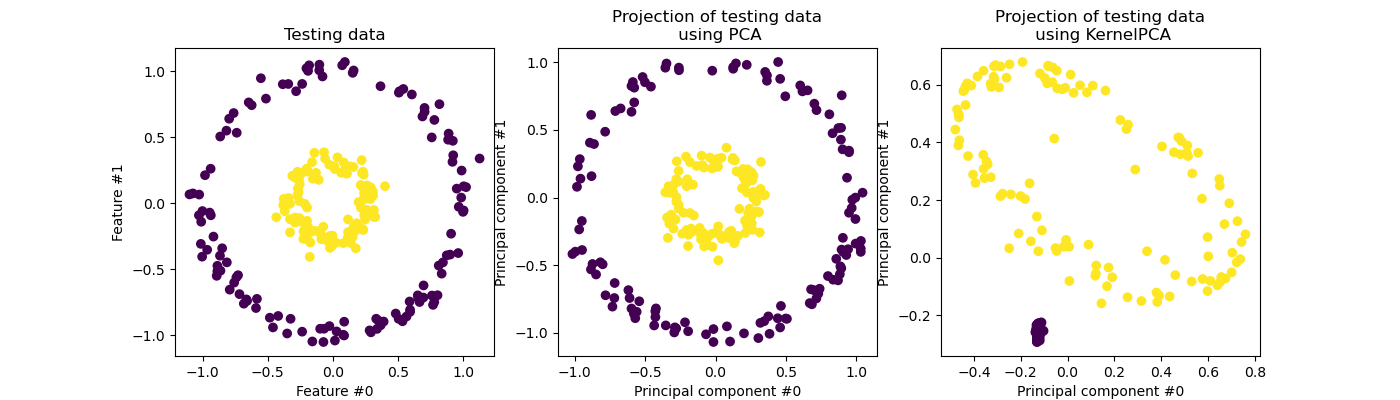

Overview of outlier detection methods

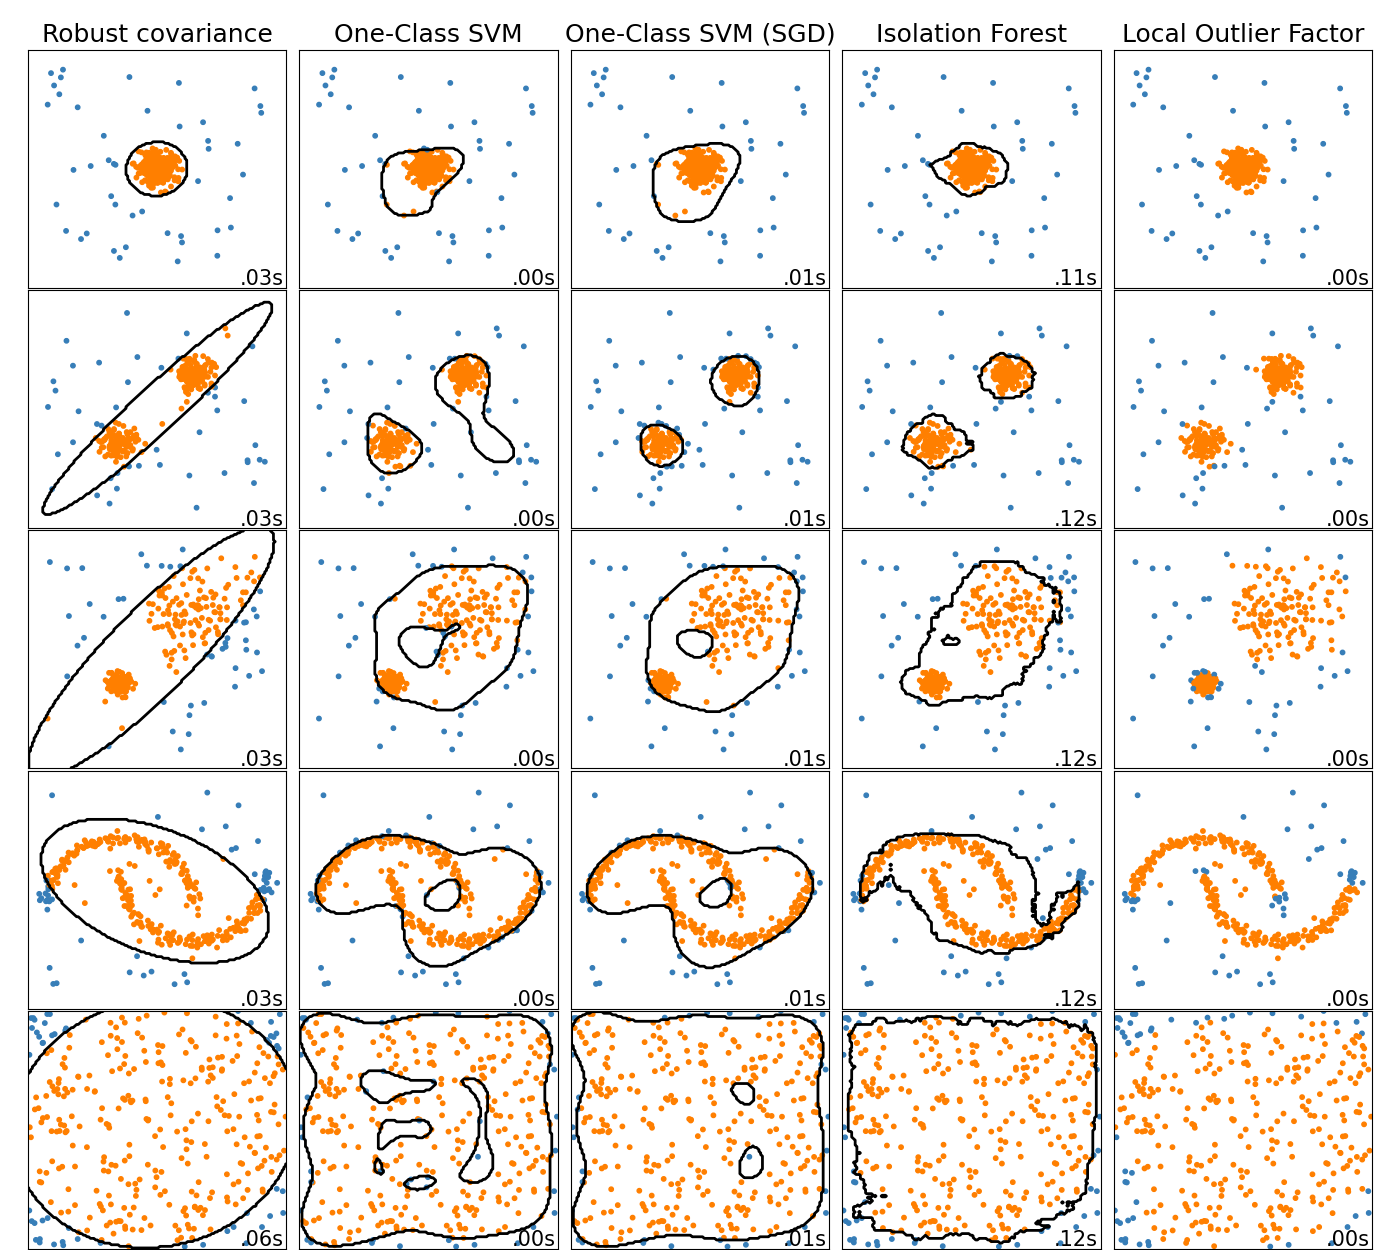

Outlier Detection
Outlier detection is similar to novelty detection in the sense that the goal is to separate a core of regular observations from some polluting ones, called outliers. Yet, in the case of outlier detection, we don’t have a clean data set representing the population of regular observations that can be used to train any tool.

Density Estimation

Density Estimation: Histograms

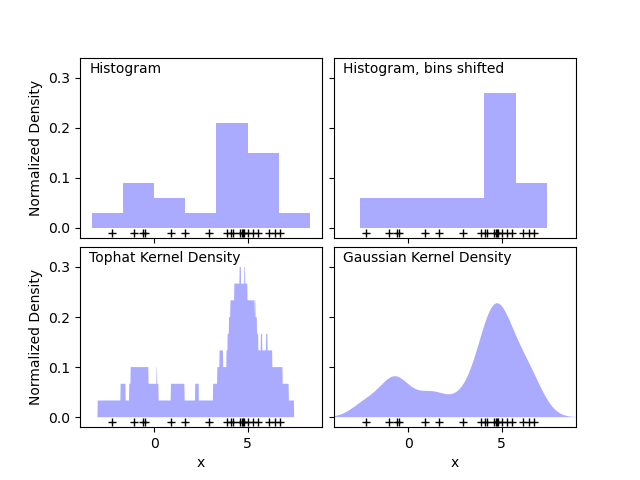

Kernel Density Estimation

Kernel density estimation in scikit-learn is implemented in the KernelDensity estimator, which uses the Ball Tree or KD Tree for efficient queries (see Nearest Neighbors for a discussion of these). Though the above example uses a 1D data set for simplicity, kernel density estimation can be performed in any number of dimensions, though in practice the curse of dimensionality causes its performance to degrade in high dimensions.

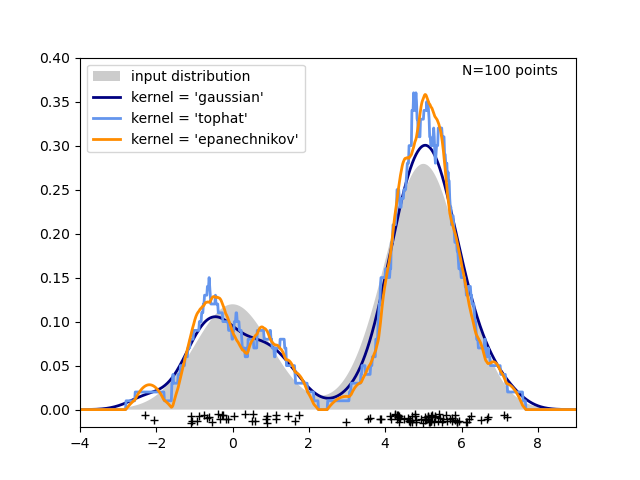

Restricted Boltzmann machines

Restricted Boltzmann machines (RBM) are unsupervised nonlinear feature learners based on a probabilistic model. The features extracted by an RBM or a hierarchy of RBMs often give good results when fed into a linear classifier such as a linear SVM or a perceptron.

The model makes assumptions regarding the distribution of inputs. At the moment, scikit-learn only provides BernoulliRBM, which assumes the inputs are either binary values or values between 0 and 1, each encoding the probability that the specific feature would be turned on.

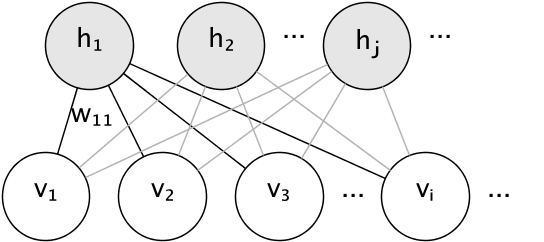